In [ ]:
import keras

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

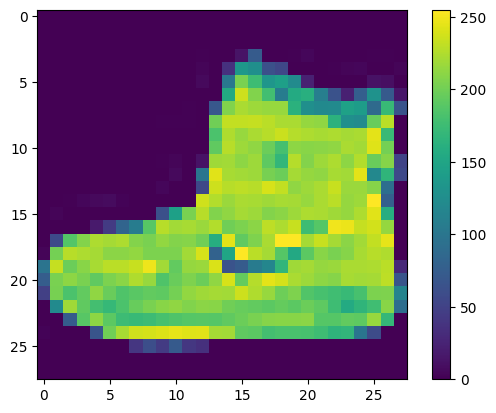

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

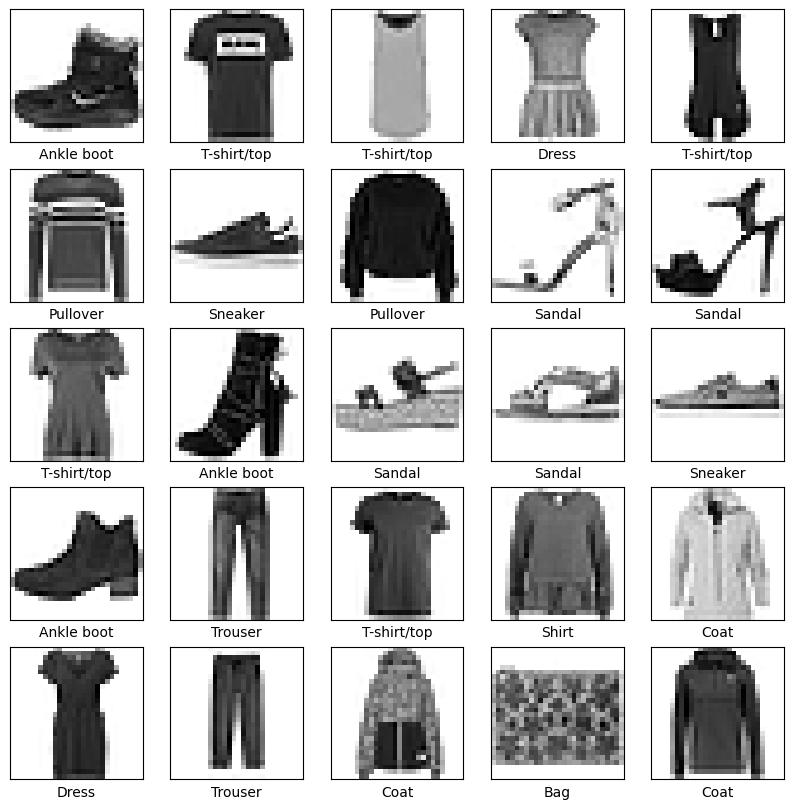

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid("off")
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4993 - accuracy: 0.8239
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3758 - accuracy: 0.8640
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3373 - accuracy: 0.8774
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3123 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2958 - accuracy: 0.8912


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy =", test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.3719 - accuracy: 0.8680
Test Accuracy = 0.8679999709129333


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 2s 7ms/step


In [ ]:
predictions[0]

array([5.9628259e-05, 1.5130485e-05, 1.2084456e-05, 4.2519520e-07,
       1.2248764e-05, 2.7331994e-03, 1.9306119e-05, 5.9863895e-02,
       7.2586932e-05, 9.3721151e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

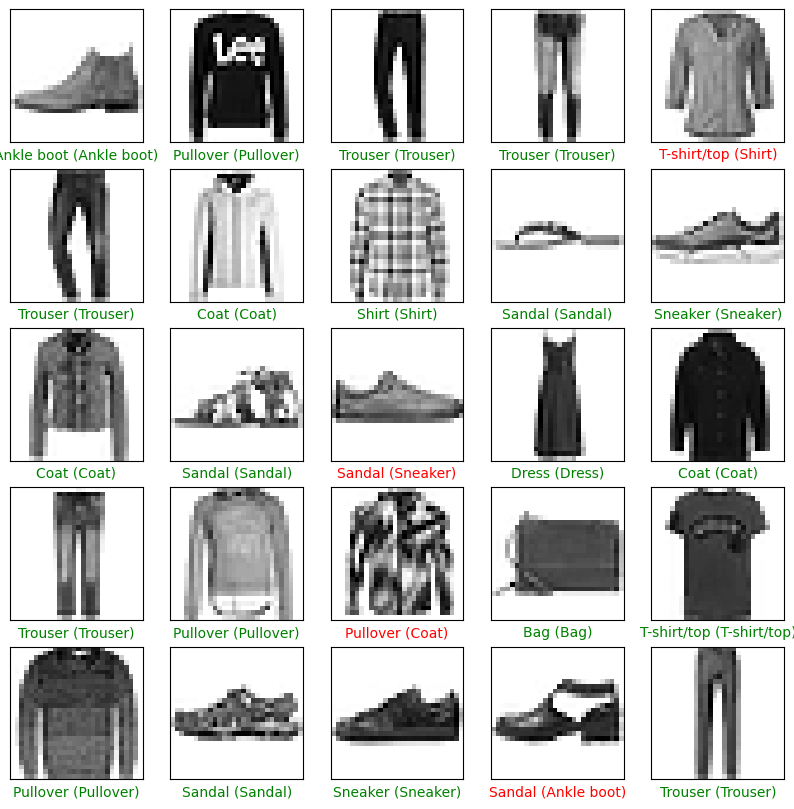

In [ ]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid("off")
  plt.imshow(test_images[i], cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = "green"
  else:
    color = "red"
  plt.xlabel("{} ({})".format(class_names[predicted_label],
                              class_names[true_label]),
                              color = color)

# **Give the required test image index in n**

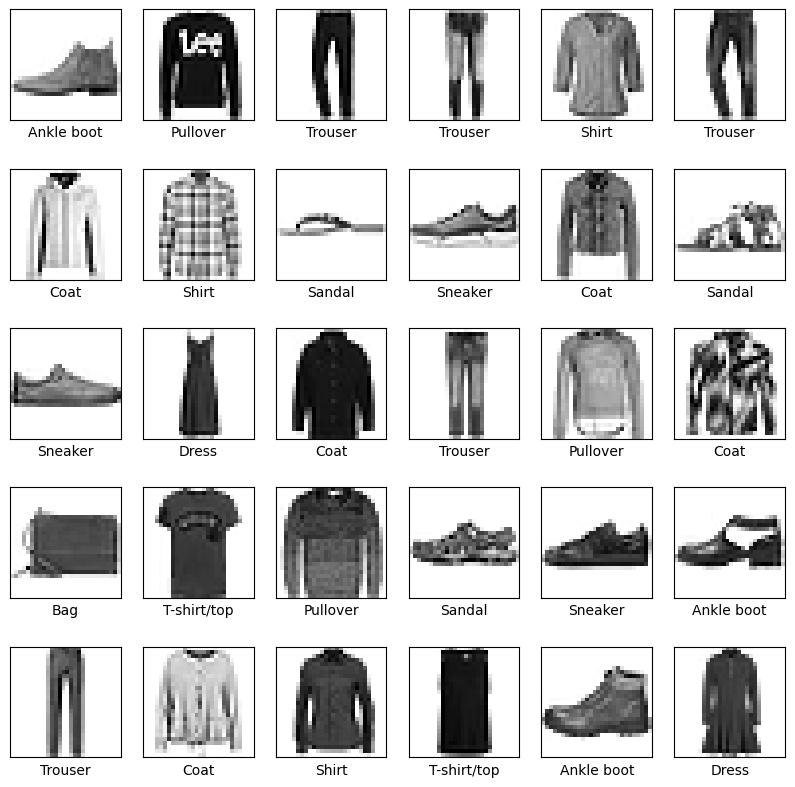

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10, 10))
for i in range(30):
  plt.subplot(5, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid("off")
  plt.imshow(test_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[test_labels[i]])

In [ ]:
n = 18
img = test_images[n]
print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [ ]:
predictions = model.predict(img)
print(predictions)

1/1 [==============================] - 0s 20ms/step
[[2.4284825e-05 2.2631001e-07 8.6362188e-06 6.4706131e-07 7.5905277e-06
  1.8038245e-05 7.2425801e-06 2.0804981e-05 9.9991143e-01 1.1011103e-06]]


In [ ]:
prediction = predictions[0]
ind = np.argmax(prediction)
print(class_names[ind])

Bag


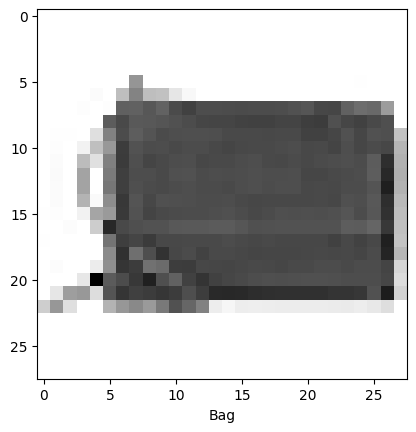

In [100]:
plt.figure()
plt.imshow(test_images[n], cmap = plt.cm.binary)
plt.xlabel(class_names[ind])
plt.gca().grid(False)